<a href="https://colab.research.google.com/github/hosein-jamshidian/Persian_Speech_to_Text/blob/main/persian_speech_to_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

import os
import random
import shutil

In [2]:
!pip install python_speech_features # for feature extraction

!pip install python-Levenshtein

In [3]:
!unzip /content/drive/MyDrive/DATASETS/Persian-Speech-To-Text-Audios.zip

Archive:  /content/drive/MyDrive/DATASETS/Persian-Speech-To-Text-Audios.zip
  inflating: Persian-Speech-To-Text-Audios/12440123.wav  
  inflating: Persian-Speech-To-Text-Audios/12440124.wav  
  inflating: Persian-Speech-To-Text-Audios/12440126.wav  
  inflating: Persian-Speech-To-Text-Audios/12440127.wav  
replace Persian-Speech-To-Text-Audios/12440128.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Persian-Speech-To-Text-Audios/12440128.wav  
  inflating: Persian-Speech-To-Text-Audios/12440129.wav  
  inflating: Persian-Speech-To-Text-Audios/12440130.wav  
  inflating: Persian-Speech-To-Text-Audios/12440135.wav  
  inflating: Persian-Speech-To-Text-Audios/12440141.wav  
  inflating: Persian-Speech-To-Text-Audios/12440143.wav  
replace Persian-Speech-To-Text-Audios/12440145.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace Persian-Speech-To-Text-Audios/12440145.wav? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Persian-Speech-To-Text-Aud

In [4]:
df=pd.read_excel('/content/Persian-Speech-To-Text-Maps.xlsx')
df.head()

,audio,text
0,myaudio/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...
1,myaudio/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...
2,myaudio/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...
3,myaudio/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...
4,myaudio/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...


In [5]:
df.shape

(500, 2)

In [6]:
df.isnull().sum()

audio    0
text     0
dtype: int64

In [7]:
nums=[i for i in range(0,500)]
random.shuffle(nums)

In [8]:
train_size=int(len(nums)*.8)
val_size=int(len(nums)*.15)
test_size=int(len(nums)*.05)

train=nums[:train_size]
val=nums[train_size:(train_size+val_size)]
test=nums[(train_size+val_size):(train_size+val_size+test_size)]

In [9]:
df.loc[train,'datasplit']='train'
df.loc[val,'datasplit']='val'
df.loc[test,'datasplit']='test'

In [10]:
df['datasplit'].value_counts()

train    400
val       75
test      25
Name: datasplit, dtype: int64

In [11]:
!mkdir train
!mkdir test
!mkdir val

mkdir: cannot create directory ‘train’: File exists
mkdir: cannot create directory ‘test’: File exists
mkdir: cannot create directory ‘val’: File exists


In [12]:
x = 'train/' +df.iloc[1]['audio'].split('/')[1]
x.split('/')[1]

'12440124.wav'

In [13]:
df.iloc[1]['audio'].split('/')

['myaudio', '12440124.wav']

In [14]:
def move_files(row):
    if row['datasplit'] == 'train':
        row['audio'] = 'train/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'val':
        row['audio'] = 'val/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' +row['audio'].split('/')[1], row['audio'])

    elif row['datasplit'] == 'test':
        row['audio'] = 'test/' + row['audio'].split('/')[1]
        shutil.move('/content/Persian-Speech-To-Text-Audios/' + row['audio'].split('/')[1], row['audio'])

    return row

In [15]:
df = df.apply(move_files, axis=1)

In [16]:
# Preprocessing

In [17]:
from python_speech_features import mfcc
import scipy.io.wavfile as wav

from IPython.display import Audio
from IPython.display import display

In [18]:
sample = 'test/'
sample += os.listdir(sample)[0]

(rate,sig) = wav.read(sample)

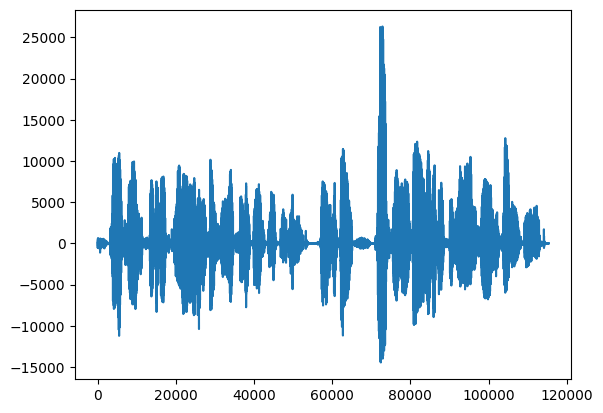

In [19]:
plt.plot(sig)
plt.show()

In [20]:
sample_audio= Audio(sample, autoplay=False)
display(sample_audio)

In [21]:
mfcc_features = mfcc(sig,rate)
print(mfcc_features.shape)

(720, 13)


In [37]:
df['MFCC features'] = None

In [38]:
df.head()

,audio,text,datasplit,MFCC features
0,train/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,train,None
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,None
2,train/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,train,None
3,train/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,train,None
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,None


In [39]:
for i in tqdm(range(500)):
    file_name = df.loc[i, 'audio']
    (rate,sig) = wav.read(file_name)
    mfcc_features = mfcc(sig,rate)
    df.loc[i, 'MFCC features'] = [mfcc_features]

<ipython-input-39-e269bd30e0a8>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(range(500)):


  0%|          | 0/500 [00:00<?, ?it/s]

In [40]:
df.head()

,audio,text,datasplit,MFCC features
0,train/12440123.wav,آبنبات های تومک را گرفت گفت ممنون پسرم نه من ...,train,"[[[11.53494370737191, -3.370294705789073, -4.2..."
1,train/12440124.wav,قبلا هم به تو گفتم هیچ وقتم استراحت ندارم فقط ...,train,"[[[10.105730436984143, -2.4352324174037987, -3..."
2,train/12440126.wav,می شد او را یک فیلسوف به حساب آورد او عاشق چیز...,train,"[[[9.91634332069268, -2.559946185140254, -4.98..."
3,train/12440127.wav,اگر تومک فراموش می کرد برایش آبنبات بیاورد درس...,train,"[[[11.225249404021213, -3.406866944024387, -2...."
4,train/12440128.wav,نان های ادویه دار قلبی شکل را بیشتر دوست داشت ...,train,"[[[8.637159353566885, -2.757131992489463, -5.7..."


In [52]:
unique_chars=pd.unique(list(df['text'].sum()))